<img src='./img/image1.png'>
<h1>Questionamentos levantados</h1>

Dentre as análises geradas utilizando os dados disponíveis do CENIPA, as seguintes perguntas irão ser respondidas:
<br>
<br>
<li> 1 - Quais são as classificações de ocorrência no CENIPA?</li>
<li> 2 - Quais são os Estados que possuem ocorrências? E quais são os top 10 dos Estados com maiores ocorrências de acidentes? 
<li> 3 - Quantas ocorrências envolvendo acidentes os relatórios foram divulgados?  
<li> 4 - Qual o número de aeronaves envolvidas em ocorrências no CENIPA? E quantas delas são classificadas como acidente?     
<li> 5 - Quais são as categorias dos operadores das aeronaves que apresentaram ocorrência?  
<li> 6 - Quais são os tipos de veículos que tiveram ocorrência?  
<li> 7 - Em quais tipos de veículo ocorreram mais acidentes?  
<li> 8 - Quais são os tipos de motor de aeronaves em que ocorreram mais acidentes?
<li> 9 - Qual é o top 10 de tipos de ocorrências registrados no CENIPA? E quais são os top 10 de acidentes? 

<h1>Previsão dos casos de ocorrência via aplicativo shinyAPP denominado 'A3data'</h1>
<br>
<li> A ideia de construir um app em linguagem R utilizando o shinyAPP foi para termos uma visualização das ocorrências por classificação, e realizar uma previsão dessas ocorrências, com o objetivo de facilitar as politicas de manutenção de regras e novos abordagens para se evitar ao máximo essa ocorrência.
<li> O aplicativo encontra-se em https://gx1jfd-caio-balieiro.shinyapps.io/A3data/    

In [1]:
# bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
# Carreganndo os conjuntos de dados de ocorrencia e aeronave
ocorrencia = pd.read_csv('ocorrencia.csv', sep =';')
aeronave = pd.read_csv('aeronave.csv', sep =';')
tipo = pd.read_csv('ocorrencia_tipo.csv', sep =';')
recomendacao = pd.read_csv('recomendacao.csv', sep =';')

In [3]:
# Verificando a dimensão dos dados de ocorrência
ocorrencia.shape

(5167, 22)

In [4]:
# Verificando a dimensão dos dados de aeronave
aeronave.shape

(5235, 23)

# Preparando os dados para responder as perguntas propostas no projeto

In [5]:
ocorrencia.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


In [6]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   codigo_ocorrencia1              5167 non-null   int64 
 2   codigo_ocorrencia2              5167 non-null   int64 
 3   codigo_ocorrencia3              5167 non-null   int64 
 4   codigo_ocorrencia4              5167 non-null   int64 
 5   ocorrencia_classificacao        5167 non-null   object
 6   ocorrencia_latitude             4192 non-null   object
 7   ocorrencia_longitude            4192 non-null   object
 8   ocorrencia_cidade               5167 non-null   object
 9   ocorrencia_uf                   5167 non-null   object
 10  ocorrencia_pais                 5167 non-null   object
 11  ocorrencia_aerodromo            5167 non-null   object
 12  ocorrencia_dia                  5167 non-null   

#### Como apresentado acima o conjunto de dados de apresenta 5167 linhas (número de ocorrências), através das colunas  vamos responder as perguntas propostas inicialmente. 

<h1>Respostas as perguntas utilizando o conjunto de dados ocorrência (Insights)</h1>

<br> A primeira pergunta que será respondida é: <br>
### Quais são as classificações de ocorrência no CENIPA?

In [7]:
ocorrencia['ocorrencia_classificacao'].value_counts()

registro = pd.DataFrame(ocorrencia['ocorrencia_classificacao'].value_counts())
freq = np.array(ocorrencia['ocorrencia_classificacao'].value_counts()/ len(ocorrencia) * 100)
registro['Porcentagem'] = freq
registro

,ocorrencia_classificacao,Porcentagem
INCIDENTE,2809,54.364235
ACIDENTE,1667,32.262435
INCIDENTE GRAVE,691,13.373331


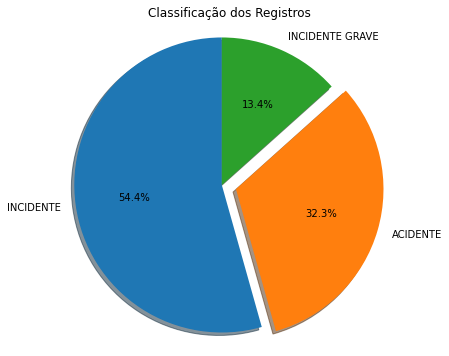

In [8]:

porcentagem = ocorrencia['ocorrencia_classificacao'].value_counts()/ ocorrencia['ocorrencia_classificacao'].count()


# Gráfico de setores por classificação de ocorrência
labels = ['INCIDENTE', 'ACIDENTE', 'INCIDENTE GRAVE']
sizes = porcentagem[0:3]
explode = (0, 0.1, 0) 
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.
plt.title('Classificação dos Registros')
plt.savefig('p1.pdf')



### Nota que, a classificação de ocorrências é dada por Incidente, Acidente e Incidente grave, sendo que 54% corresponde a incidentes, 32% a acidentes e apenas 13,4% para incidente grave. 

<br>A segunda pergunta que será respondida é: <br>
###  Quais são os Estados que possuem ocorrências? E quais são os top 10 dos Estados com maiores ocorrências de acidentes?


In [9]:
ocorrencia_acidente = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE']

In [10]:
UF = ocorrencia_acidente['ocorrencia_uf'].value_counts()
UF

SP     348
MT     157
RS     155
MG     141
PR     133
PA     117
GO     114
MS      78
AM      63
RJ      58
SC      56
BA      52
RR      30
MA      27
CE      19
TO      19
RO      16
PI      14
PE      14
ES      13
AC      12
PB       7
SE       7
DF       6
AP       4
RN       4
***      2
AL       1
Name: ocorrencia_uf, dtype: int64

In [11]:
len(UF) # Quantidade de Estados com registros de ocorrência

28

In [12]:
# Filtrando os dados apenas para registros que são considerados acidentes
ocorrencia_acidente = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE']

In [13]:
registro = pd.DataFrame(ocorrencia_acidente['ocorrencia_uf'].value_counts().head(10).to_frame('Top 10 registros de acidentes'))
freq = np.array(ocorrencia_acidente['ocorrencia_uf'].value_counts().head(10)/ ocorrencia_acidente['ocorrencia_uf'].value_counts().head(10).sum() * 100)
registro['Porcentagem'] = freq
registro

,Top 10 registros de acidentes,Porcentagem
SP,348,25.513196
MT,157,11.510264
RS,155,11.363636
MG,141,10.337243
PR,133,9.750733
PA,117,8.577713
GO,114,8.357771
MS,78,5.718475
AM,63,4.618768
RJ,58,4.252199


In [14]:
ocorrencia_acidente['ocorrencia_uf'].value_counts().head(10).sum()

1364

In [ ]:
ax =  ocorrencia_acidente['ocorrencia_uf'].value_counts().head(10).plot(kind='bar', figsize=(12,5))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
plt.xlabel('Estado')
plt.ylabel('Quantidade de Acidentes')
plt.title('Quantidade de acidentes por Estado')
plt.xticks(rotation=35)
plt.ylim([0, 400])
plt.savefig('p2.pdf')

### Como  apresentado acima, todos os Estados do Brasil apresentam ocorrências. Um pergunta interessante que pode-se fazer é em quais Estados os registros de ocorrência são maiores. Com base na Tabela e gráfico acima, tem-se o Top 10 dos estados com maiores registros, dentre eles são: SP com 348 acidentes MT em segundo com 157 acidentes, e o último é a RJ com 58 registros de acidentes.

<br>A terceira pergunta que será respondida é: <br>
### Quantas ocorrências envolvendo acidentes foram finalizadas?

In [ ]:
finalizas = pd.DataFrame(ocorrencia_acidente['divulgacao_relatorio_publicado'].value_counts())
freq = np.array(ocorrencia_acidente['divulgacao_relatorio_publicado'].value_counts()/ len(ocorrencia_acidente) * 100)
finalizas['Porcentagem'] = freq
finalizas

In [ ]:
# Gráfico de setores por classificação de ocorrência
porcentagem = ocorrencia_acidente['divulgacao_relatorio_publicado'].value_counts()/ len(ocorrencia_acidente)
labels = ['Sim', 'Não']
sizes = porcentagem[0:2]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)  # gráfico de pizza
ax1.axis('equal')   # Proporção de aspecto igual garante que a torta seja desenhada como um círculo.
plt.savefig('p3.pdf')

### Em casos onde ocorrem acidentes é importante que os relatórios técnicos das causas do acidentes sejam divulgados o mais rápido possível, pois, através desse acidente pode-se estudar como não cometer mais os erros humanos, identificar causas mecânicas que são apresentadas no relatório. Com base no gráfico acima, tem-se que 61,7% dos relatórios técnicos foram apresentados e 38% não apresetaram o relatório.

<br>A quarta pergunta que será respondida é: <br>
### Qual o número de aeronaves envolvidas em ocorrências no CENIPA? E quantas delas são classificadas como acidente? 



In [ ]:
envolvidas = pd.DataFrame(ocorrencia['total_aeronaves_envolvidas'].value_counts())
freq = np.array(ocorrencia['total_aeronaves_envolvidas'].value_counts()/ len(ocorrencia) * 100)
envolvidas['Porcentagem'] = freq
envolvidas

In [ ]:
ax = ocorrencia['total_aeronaves_envolvidas'].value_counts().plot(kind='bar', figsize=(11,5))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
plt.xlabel('Número de aeronaves')
plt.ylabel('Quantidade de registros')
plt.title('Quantidade aeronaves por registro')
plt.xticks(rotation=35)
plt.savefig('p4.pdf')

### Com base na Tabela acima e gráfico de barras, tem-se que grande parte das ocorrências foram apenas com uma única aeronave (cerca de 98% delas), 62 registros foram com 2 aeronaves e apenas 3 com três aeronaves.

In [ ]:
envolvidas = pd.DataFrame(ocorrencia_acidente['total_aeronaves_envolvidas'].value_counts())
freq = np.array(ocorrencia_acidente['total_aeronaves_envolvidas'].value_counts()/ len(ocorrencia_acidente) * 100)
envolvidas['Porcentagem'] = freq
envolvidas

In [ ]:
ax = ocorrencia_acidente['total_aeronaves_envolvidas'].value_counts().plot(kind='bar', figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.xlabel('Número de aeronaves')
plt.ylabel('Quantidade de registros')
plt.title('Quantidade de aeronaves por registro')
plt.xticks(rotation=35)
plt.ylim([0, 2000])
plt.savefig('p4.pdf')

### Com base a Tabela e Gráfico acima, o número de ocorrências classificadas como acidente tiveram mais casos com apenas uma aeronave 1656, enquanto que apenas 11 registros foram considerando acidentes com duas aeronaves.

In [ ]:
# Verificado as colunas do conjunto de dados referete a aeronaves.
aeronave.info()

<br>A quinta pergunta que será respondida é: <br>
### Quais são as categorias dos operadores das aeronaves que apresentaram ocorrência?  



In [ ]:
operador = pd.DataFrame(aeronave['aeronave_operador_categoria'].value_counts())
freq = np.array(aeronave['aeronave_operador_categoria'].value_counts()/ len(aeronave) * 100)
operador['Porcentagem'] = freq
operador

In [ ]:
ax = aeronave['aeronave_operador_categoria'].value_counts().plot(kind='bar', figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.xlabel('Categoria do Operador')
plt.ylabel('Quantidade de registros')
plt.title('Quantidade de operadores por registro')
plt.xticks(rotation=35)
plt.savefig('p5.pdf')

### Com base na Tabela e Gráfico tem-se que grande parte da categoria dos operadores é ocupada por uma categoria que não foi divulgada pelo conjunto de dados, em segundo lugar temos a regular e por último temos a múltipla.

<br>A sexta pergunta que será respondida é: <br>
### Quais são os tipos de veículos que tiveram ocorrência? 

In [ ]:
aeronave['aeronave_tipo_veiculo']
tipo3 = pd.DataFrame(aeronave['aeronave_tipo_veiculo'].value_counts())
freq = np.array(aeronave['aeronave_tipo_veiculo'].value_counts()/ len(aeronave) * 100)
tipo3['Porcentagem'] = freq
tipo3

In [ ]:
len(aeronave)

In [ ]:
ax = aeronave['aeronave_tipo_veiculo'].value_counts().plot(kind='bar', figsize=(11,5))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.xlabel('Tipo de veículo')
plt.ylabel('Quantidade de registros')
plt.title('Quantidade de veículos')
plt.xticks(rotation=35)
plt.savefig('p6.pdf')

### No que se refere a quantidade de veículos, tem-se que 80% dos veículos são classificados como avião, 10% como helicóptero, e os apresetam uma porcentagem abaixo de 6%. 

### Uma pergunta interessante que pode surgir na análise seria: Em quais tipos de veículo ocorrem mais acidentes?

<br>A sétima pergunta que será respondida é: <br>
### Em quais tipos de veículo ocorrem mais acidentes?

In [ ]:
# Construido um Tabela utilizando a função merge, para juntar dois conjuntos de dados ligado pela chave ocorrência 2
Tabela =  pd.merge(ocorrencia, aeronave, on=["codigo_ocorrencia2","codigo_ocorrencia2"], how="left")
Tabela

In [ ]:
# Filtrando apenas para os acidentes 
aeronave_acidente = Tabela[Tabela['ocorrencia_classificacao'] == 'ACIDENTE']
aeronave_acidente.shape

In [ ]:
aeronave_acidente['aeronave_tipo_veiculo']
tipo_2 = pd.DataFrame(aeronave_acidente['aeronave_tipo_veiculo'].value_counts())
freq = np.array(aeronave_acidente['aeronave_tipo_veiculo'].value_counts()/ len(aeronave_acidente) * 100)
tipo_2['Porcentagem'] = freq
tipo_2

In [ ]:
ax = aeronave_acidente['aeronave_tipo_veiculo'].value_counts().plot(kind='bar', figsize=(11,5))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.xlabel('Tipo de veículo')
plt.ylabel('Quantidade de registros')
plt.title('Quantidade de veículos')
plt.xticks(rotation=15)
plt.savefig('p7.pdf')

### Observa-se que 72% dos acidentes são com avião, 12% são com Ultraleve e 11% com Helicóptero, e os demais tipos ficam abaixo de 3%.

<br>A oitava pergunta que será respondida é: <br>
### Quais são os tipos de motor de aeronaves em que ocorreram mais acidentes?

In [ ]:
aeronave_acidente['aeronave_motor_tipo'].value_counts()

In [ ]:
aeronave_acidente['aeronave_motor_tipo']
tipo_2 = pd.DataFrame(aeronave_acidente['aeronave_motor_tipo'].value_counts())
freq = np.array(aeronave_acidente['aeronave_motor_tipo'].value_counts()/ len(aeronave_acidente) * 100)
tipo_2['Porcentagem'] = freq
tipo_2

In [ ]:
ax = aeronave_acidente['aeronave_motor_tipo'].value_counts().plot(kind='bar', figsize=(11,5))
for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
plt.xlabel('Tipo de motor do veículo')
plt.ylabel('Quantidade de registros')
plt.title('Quantidade de veículos por tipo de motor')
plt.xticks(rotation=15)
plt.savefig('p8.pdf')

### Com base nos resultados acima referentes a Tabela e Gráfico, tem-se que 80% dos acidentes com veículos ocorrem com as que possuem motor pistão, enquanto que os demais motores representam menos de 20% dos acidentes. De acordo com https://aeromagazine.uol.com.br/artigo/cuidados-com-o-motor-a-pistao_332.html, essa relação alta de acidentes com veículos de motor de pistão se dá pelo fato de que a pistão emitem sinais de panes que estão por vir. Vibrações excessivas, funcionamento áspero, falhas ocasionais e a cor interna dos escapamentos podem significar sintomas de que algo não anda bem.

<br>A nona pergunta que será respondida é: <br>
### Qual é o top 10 de tipos de ocorrências registrados no CENIPA? E quais são os top 10 de acidentes? 

In [ ]:
tipo.info()

In [ ]:
tipo['ocorrencia_tipo'].value_counts()
tipo['ocorrencia_tipo']
tipo_2 = pd.DataFrame(tipo['ocorrencia_tipo'].value_counts().head(5))
freq = np.array(tipo['ocorrencia_tipo'].value_counts().head(5)/ tipo['ocorrencia_tipo'].value_counts().head(5).sum() * 100)
tipo_2['Porcentagem'] = freq
tipo_2

In [ ]:
ax = tipo['ocorrencia_tipo'].value_counts().head(5).plot(kind='barh', figsize=(11,5))
ax.bar_label(ax.containers[0])
plt.xlabel('Frequência')
plt.ylabel('Tipo de ocorrência')
plt.title('Tipo de ocorrência')
plt.xticks(rotation=35)
plt.savefig('p9.png')

### Com base na tabela e gráfico acima, tem-se que falha do motor em voo é a ocorrência que mais ocorre dentre os registrado correspondendo a 26%, enquanto que falha ou mau funcionamento de sistema/compenonente ocorre em 23% das ocorrências, estouro de pneu ocorre em 22% dos casos, perda de controle no solo representa 15% das ocorrências, e perna de controle em voo é 12%

In [ ]:
# Construido um Tabela utilizando a função merge, para juntar dois conjuntos de dados ligado pela chave ocorrência 2
tipo_merge =  pd.merge(ocorrencia, tipo, on=["codigo_ocorrencia1","codigo_ocorrencia1"], how="left")
tipo_merge.shape

In [ ]:
# Filtrando apenas para os acidentes 
tipo_acidente = tipo_merge[tipo_merge['ocorrencia_classificacao'] == 'ACIDENTE']
tipo_acidente.shape

In [ ]:
tipo_2 = pd.DataFrame(tipo_acidente['ocorrencia_tipo'].value_counts().head(5))
freq = np.array(tipo_acidente['ocorrencia_tipo'].value_counts().head(5)/ tipo_acidente['ocorrencia_tipo'].value_counts().head(5).sum() * 100)
tipo_2['Porcentagem'] = freq
tipo_2

In [ ]:
ax = tipo_acidente['ocorrencia_tipo'].value_counts().head(5).plot(kind='barh', figsize=(11,5))
ax.bar_label(ax.containers[0])
plt.xlabel('Frequência')
plt.ylabel('Tipo de ocorrência por acidente')
plt.title('Tipo de ocorrência de acidente')
plt.xticks(rotation=35)
plt.show()

### No que se refere a tipos de ocorrência que ocasioaram acidentes, tem-se que 24% são causadas por falha do motor em voo, 22% ocorrem com perda de controle em voo, 13% das ocorrências de acidennte são por perda de controle no solo e as demais classificações correspondem a porcentagens menores que 9%